In [1]:
import unicodecsv

with open('data_sets/suicides_data.csv','rb') as file:
    reader = unicodecsv.DictReader(file)
    suicide_data = list(reader)
len(suicide_data)

237519

In [2]:
actual_deaths= list()
for data in suicide_data:
    if data['Total'] != '0':
        actual_deaths.append(data)

actual_deaths.sort(key=lambda x:x.get('Total'), reverse = False)

actual_deaths


[{'State': 'A & N Islands',
  'Year': '2001',
  'Type_code': 'Causes',
  'Type': 'Love Affairs',
  'Gender': 'Female',
  'Age_group': '0-14',
  'Total': '1'},
 {'State': 'A & N Islands',
  'Year': '2001',
  'Type_code': 'Causes',
  'Type': 'Other Causes (Please Specity)',
  'Gender': 'Female',
  'Age_group': '0-14',
  'Total': '1'},
 {'State': 'A & N Islands',
  'Year': '2001',
  'Type_code': 'Causes',
  'Type': 'Other Prolonged Illness',
  'Gender': 'Male',
  'Age_group': '0-14',
  'Total': '1'},
 {'State': 'A & N Islands',
  'Year': '2001',
  'Type_code': 'Causes',
  'Type': 'Failure in Examination',
  'Gender': 'Male',
  'Age_group': '0-14',
  'Total': '1'},
 {'State': 'A & N Islands',
  'Year': '2001',
  'Type_code': 'Causes',
  'Type': 'Failure in Examination',
  'Gender': 'Male',
  'Age_group': '15-29',
  'Total': '1'},
 {'State': 'A & N Islands',
  'Year': '2001',
  'Type_code': 'Causes',
  'Type': 'Death of Dear Person',
  'Gender': 'Female',
  'Age_group': '30-44',
  'Total': 

In [3]:
death_list =list()

for deaths in actual_deaths:
    if deaths['Age_group'] == '0-100+':
        death_list.append(deaths)
len(death_list)

9879

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

deaths = pd.DataFrame()

deaths['State'] = list(map(lambda death: death['State'], death_list))
deaths['Year'] = list(map(lambda death:death['Year'], death_list))
deaths['Year'] = deaths['Year'].astype(int)
deaths['Total'] = list(map(lambda death:death['Total'], death_list))
deaths['Total'] = deaths['Total'].astype(int)

deaths

,State,Year,Total
0,A & N Islands,2001,1
1,A & N Islands,2002,1
2,A & N Islands,2002,1
3,A & N Islands,2003,1
4,A & N Islands,2003,1
...,...,...,...
9874,Total (Uts),2009,997
9875,Madhya Pradesh,2010,998
9876,Kerala,2006,999
9877,West Bengal,2003,999


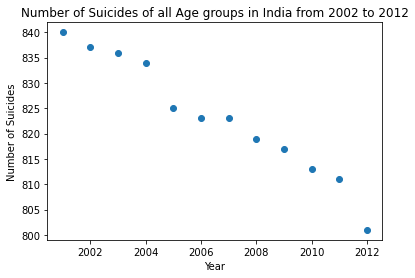

In [5]:
deaths_by_state = list(deaths['State'].value_counts())
deaths_by_year = list(deaths['Year'].value_counts())
tick_label = sorted(list(set(deaths['Year'].values.tolist())))
                      
plt.scatter(tick_label,deaths_by_year)

plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.title('Number of Suicides of all Age groups in India from 2002 to 2012')
plt.show()


In [6]:
for index in range(len(deaths_by_state)):
    if index == 6 or index == 10 or index == 16:
        del deaths_by_state[index]

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

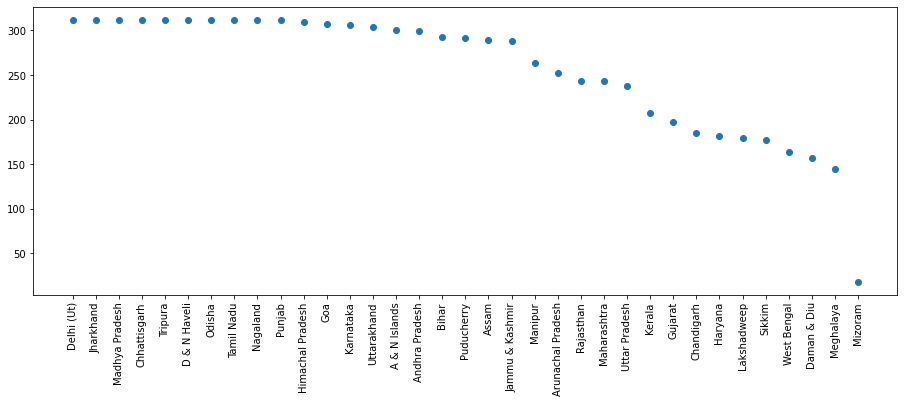

In [37]:
state_names = list(set(deaths['State'].values.tolist()))


for state in state_names:
    if state == 'Total (All India)' or state == 'Total (States)' or state == 'Total (Uts)' :
        state_names.remove(state)

plt.scatter(state_names,deaths_by_state)

plt.subplots_adjust(bottom = 5 , top = 6 , left = 8 , right = 10) 
plt.xticks(rotation=90)
plt.xlable('States')
plt.ylabel('Number of Deats')



plt.show()